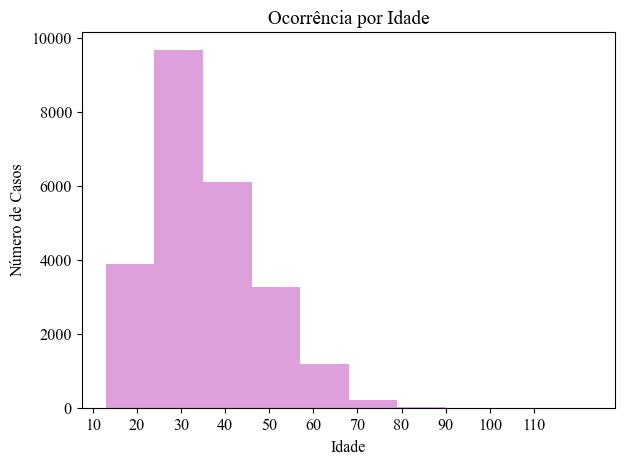

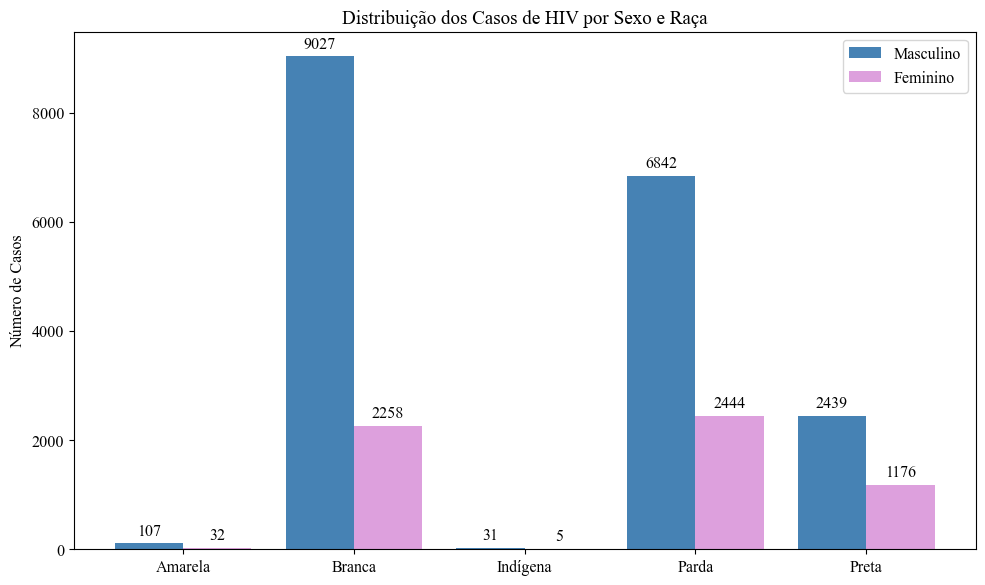

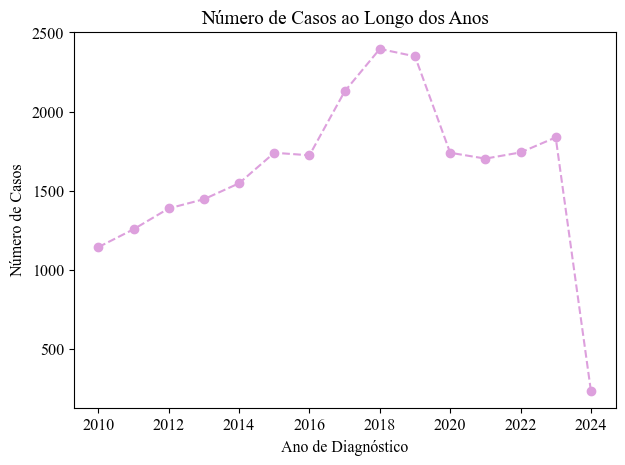

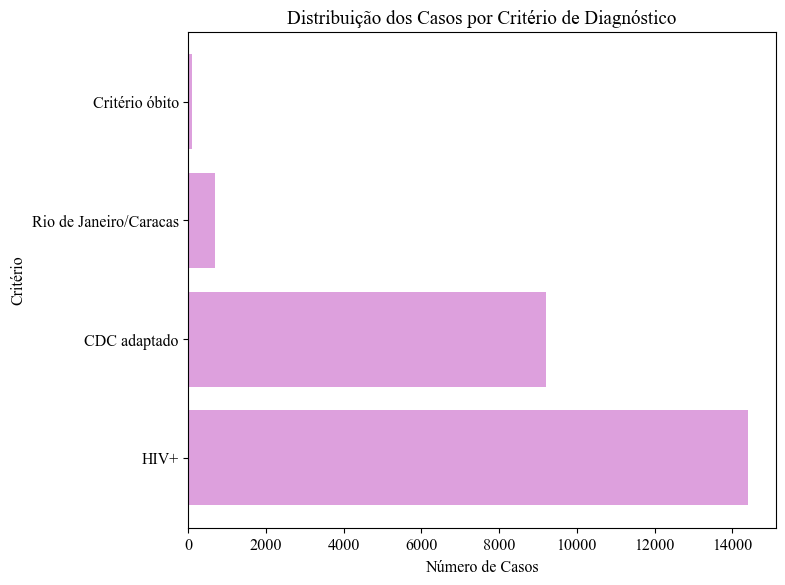

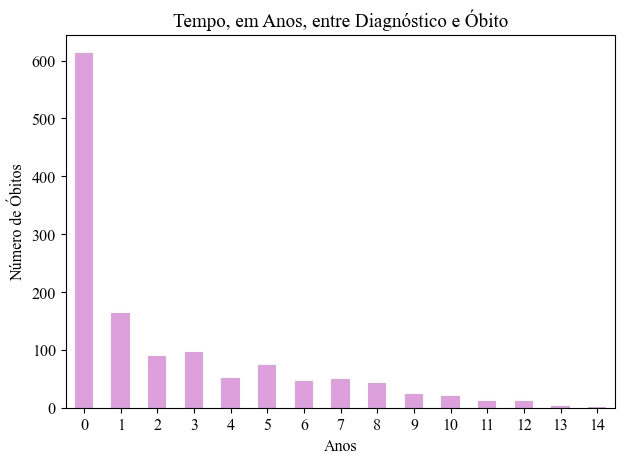

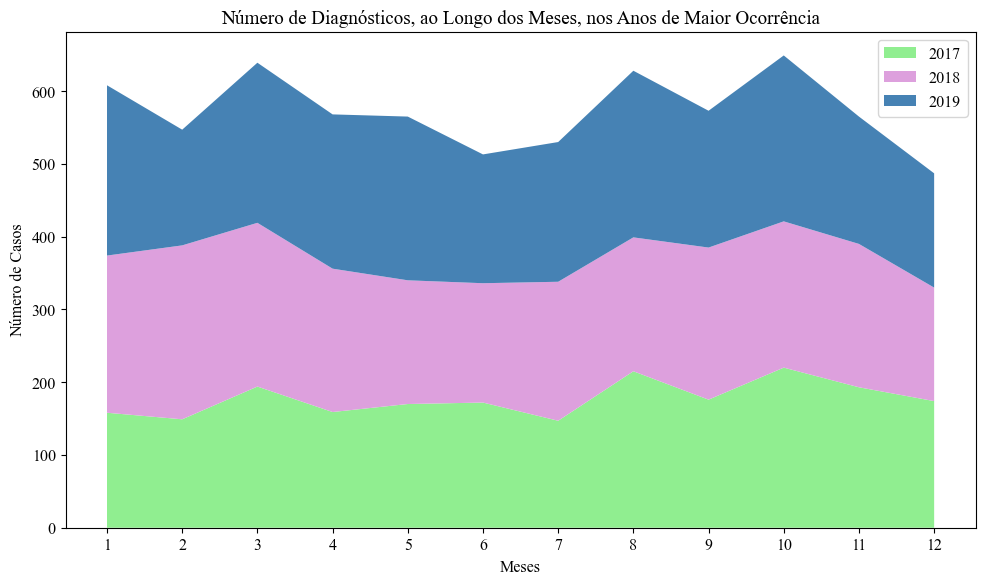

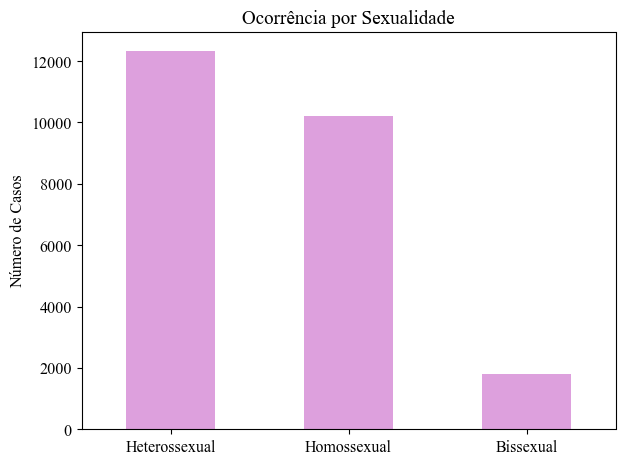

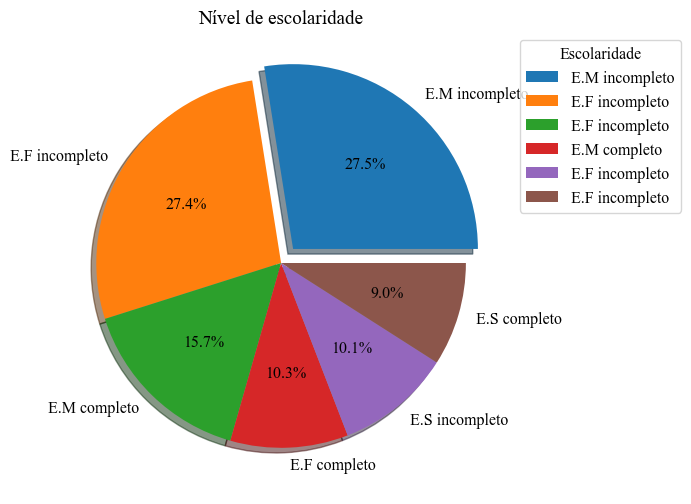

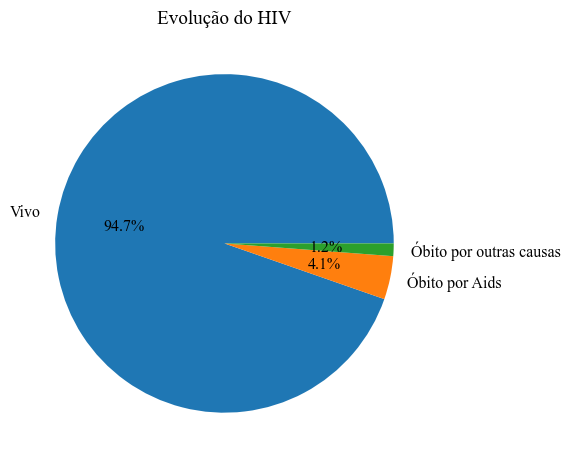

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados_aids_hiv_excel_1.xlsx')  #foi criado um arquivo excel com os dados que foram retirados do site do DATASUS sobre AIDS/

# LIMPEZA DE DADOS

df['DT_OBITO'] = df['DT_OBITO'].fillna('Vivo') # substitui os valores nulos da coluna pelo string 'vivo'
df.replace('Ignorado', np.nan, inplace=True) # substitui todas as células 'Ignorado' por um valor nulo
df.dropna(inplace=True) # remove linhas com valores nulos

# MUDANÇA DE FONTE GERAL 

plt.rcParams['font.family'] = 'serif'
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] = 11.5

# GRÁFICO DE OCORRÊNCIA POR IDADE

plt.hist(df['NU_IDADE_N'], color='plum') #criamos um histograma e personalizamos
intervalo = list(range(10, 120, 10)) #intervalo
plt.title("Ocorrência por Idade") #atribui um título ao gráfico
plt.xlabel("Idade") #nomeia o eixo x
plt.xticks(intervalo) #eixo x terá os elementos descritos em intervalo
plt.ylabel("Número de Casos") #nomeia o eixo y

plt.tight_layout() # ajusta os parâmetros do gráfico
plt.savefig("IMA_idades.png") #gera um png da análise
plt.show() #exibe o gráfico

# GRÁFICO DE DISTRUIÇÃO POR RAÇA E SEXO

df_raca_sexo = df.groupby(['CS_RACA', 'CS_SEXO']).size().unstack() # contando as combinações entre as colunas e reorganiza as colunas
raça = df_raca_sexo.index # index desse novo df é a coluna de raças 
num_Masculino = df_raca_sexo['Masculino']
num_Feminino = df_raca_sexo['Feminino']

x = np.arange(len(raça)) # cria um intervalo entre 0 até o comprimento do objeto fornecido

fig, ax = plt.subplots(figsize=(10,6)) # cria a figura e o eixo

    # criação das barras
width = 0.4
p1 = ax.bar(x - width/2, num_Masculino, width, label='Masculino', color='steelblue')
p2 = ax.bar(x + width/2, num_Feminino, width, label='Feminino', color='plum')
ax.bar_label(p1, padding=3)
ax.bar_label(p2, padding=3)

    # nomeando os demais elementos
ax.set_ylabel('Número de Casos')
ax.set_title('Distribuição dos Casos de HIV por Sexo e Raça')
ax.set_xticks(x)
ax.set_xticklabels(raça)
ax.legend() # adiciona a legenda

plt.tight_layout() # ajusta os parâmetros do gráfico
plt.savefig("IMA_raca_sexo.png")
plt.show()

# GRÁFICO DE ANO DO DIAGNÓSTICO

df['ano_DIAG'] = df['DT_DIAG'].dt.year #extrai o ano da coluna tipo 'datetime'
df['ano_DIAG'].value_counts().sort_index().plot(color="plum", marker='o', linestyle="--") # criação do gráfico
plt.title("Número de Casos ao Longo dos Anos") #atribui um título ao gráfico
plt.xlabel("Ano de Diagnóstico") #nomeia o eixo x
plt.ylabel("Número de Casos") #nomeia o eixo y

plt.tight_layout()
plt.savefig("IMA_ano_diag.png")
plt.show()

# GRÁFICO DE CASOS POR CRITÉRIO

fig, ax = plt.subplots(figsize=(8,6))

contagem = df['CRITERIO'].value_counts() # conta os valores da coluna
ax.barh(contagem.index, contagem, color="plum") # criação de um gráfico de barras horizontal 

ax.set_xlabel('Número de Casos')
ax.set_ylabel('Critério')
ax.set_title('Distribuição dos Casos por Critério de Diagnóstico')

plt.tight_layout()
plt.savefig("IMA_criterios.png")
plt.show()

# GRÁFICO DE DIFERENÇA ENTRE DIAGNÓSTICO E OBITO

df_Obito = df[df['DT_OBITO'] != 'Vivo'].copy() # cópio do dataframe

df_Obito['DT_OBITO'] = pd.to_datetime(df_Obito['DT_OBITO'], format='%Y-%m-%d')  # transformando para objeto de data
df_Obito['DT_DIAG'] = pd.to_datetime(df_Obito['DT_DIAG'], format='%Y-%m-%d')
df_Obito['ano_Obito'] = df_Obito['DT_OBITO'].dt.year # selecionando apenas o ano
df_Obito['ano_DIAGN'] = df_Obito['DT_DIAG'].dt.year

df_Obito['diferença'] = (df_Obito['ano_Obito'] - df_Obito['ano_DIAGN']) # diferença em anos
df_Obito['diferença'].astype(int).value_counts().sort_index().plot(kind='bar', color="plum") # criação do gráfico
plt.title('Tempo, em Anos, entre Diagnóstico e Óbito') # título
plt.xticks(rotation=360)
plt.xlabel('Anos') # rótulo do eixo x
plt.ylabel('Número de Óbitos') # rótulo do eixo y

plt.tight_layout()
plt.savefig("IMA_obito_diag.png")
plt.show()

# GRÁFICO DIAGNOSTICOS NO ANOS DE MAIOR OCORRENCIA
df['DT_DIAG'] = pd.to_datetime(df['DT_DIAG'], format='%Y-%m-%d')
df['mes_DIAG'] = df['DT_DIAG'].dt.month #extraindo o mês
df['ano_DIAG'] = df['DT_DIAG'].dt.year #extraindo o ano
df['ano_DIAG'] = df['ano_DIAG'].astype(str) #transformando no tipo string

df_meses_anos = df.groupby(['mes_DIAG', 'ano_DIAG']).size().unstack() # contando as combinações entre as colunas e reorganiza as colunas
meses = df_meses_anos.index 
x = np.arange(len(meses)) #

fig, ax = plt.subplots(figsize=(10,6))
ax.stackplot(x, df_meses_anos['2017'], df_meses_anos['2019'], df_meses_anos['2018'], 
             labels = ['2017', '2018', '2019'], colors=['lightgreen', 'plum', 'steelblue'])

ax.set_ylabel('Número de Casos')
ax.set_title('Número de Diagnósticos, ao Longo dos Meses, nos Anos de Maior Ocorrência')
ax.set_xlabel('Meses')
ax.set_xticks(x)
ax.set_xticklabels(meses)
ax.legend()

plt.tight_layout()
plt.savefig("IMA_meses_diag.png")
plt.show()  

# GRÁFICO DE SEXUALIDADE 
    #A PARTIR DAQUI: renomeando para destacar apenas a sexualidade
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Homo/Hemofílico', 'Homossexual'))
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Homo/Drogas', 'Homossexual'))

df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Hetero/Droga', 'Heterossexual'))
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Hetero/Hemofílico', 'Heterossexual'))
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Hetero/Droga/Hemofílico', 'Heterossexual'))
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Heterossexual/Hemofílico', 'Heterossexual'))

df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Bi/Drogas', 'Bissexual'))
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Bi/Hemofílico', 'Bissexual'))
df['ANT_REL_CA'] = df['ANT_REL_CA'].map(lambda x: str(x).replace('Bi/Droga/Hemofílico', 'Bissexual'))

df['ANT_REL_CA'].value_counts().plot(kind='bar', color="plum") # cria-se um gráfico de barras
plt.title("Ocorrência por Sexualidade") #atribui um título ao gráfico
plt.xlabel('')
plt.ylabel("Número de Casos") #nomeia o eixo y
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("IMA_sexualidade.png") #gera um png da análise
plt.show() #exibe o gráfico

# GRÁFICO DE ESCOLARIDADE
    #A PARTIR DAQUI: renomeando para facilitação do entendimento do gráfico
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('5ª a 8ª série incompleta do EF', 'E.F incompleto'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('1ª a 4ª série incompleta do EF', 'E.F incompleto'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('4ª série completa EF', 'E.F incompleto'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('Não se aplica', 'E.F incompleto'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('Educação superior incompleta', 'E.S incompleto'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('Ensino médio incompleto', 'E.M incompleto'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('Ensino fundamental completo', 'E.F completo'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('Educação superior completa', 'E.S completo'))
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(lambda x: str(x).replace('Ensino médio completo', 'E.M completo'))

    #criando a figura

fig = plt.figure(figsize =(10, 6))  #tamanho da figura
explode = [0.1, 0, 0 , 0, 0, 0]    #destacando uma das fatias
#criando o gráfico
plt.pie(df['CS_ESCOL_N'].value_counts(),
         labels = df['CS_ESCOL_N'].unique(),
         autopct='%1.1f%%',
           explode=explode,
             shadow = True)

plt.title("Nível de escolaridade") 
plt.legend(df['CS_ESCOL_N'], title = "Escolaridade", loc = "upper left", bbox_to_anchor =(1.0, 1)) #criando a legenda do gráfico
plt.savefig("IMA_nivel_escolaridade.png") #gera um pdf da análise
plt.show() #exibe o gráfico

# GRÁFICO DE PORCENTAGEM DE ÓBITO
plt.pie(df['EVOLUCAO'].value_counts(), labels = df['EVOLUCAO'].value_counts().index, autopct='%1.1f%%') # criação do gráfico de pizza
plt.title('Evolução do HIV')
plt.tight_layout()
plt.savefig("IMA_evolucao.png")
plt.show()


In [ ]:
from fpdf import FPDF

pdf = FPDF("P", "mm", "A4")

pdf.add_page()

# TÍTULO
pdf.set_x(x=0)
pdf.set_font('Times', 'B', 20)
pdf.set_fill_color(0,0,0)
pdf.set_text_color(255,255,255)
pdf.multi_cell(220, 10, 'DADOS DE HIV ENTRE 2010 E 2024 \n NO ESTADO DE MINAS GERAIS',
                align = 'C', fill=True)

# CORES E FONTE
pdf.set_fill_color(0,0,0)
pdf.set_text_color(74,50,103)
pdf.set_font('Times', '', 8)

# PRIMEIRA LINHA DE GRÁFICOS 
pdf.rect(x=6,y=34,w=94,h=75.5,style='F')
pdf.image('IMA_idades.png', x = 9, y = 38, w = 88, h = 67.5)
pdf.text(10,114, "Histograma indicando uma maior frequência de HIV na faixa etária 25-35.")

pdf.rect(x=108,y=34,w=94,h=75.5,style='F')
pdf.image('IMA_ano_diag.png', x = 111, y = 38, w = 88, h = 67.5)
pdf.text(106,114,"Gráfico demonstra a trajetória dos casos de infecção pelo HIV de 2010 a março de 2024.")

# SEGUNDA LINHA DE GRÁFICOS
pdf.rect(x=6,y=117,w=94,h=75.5,style='F')
pdf.image('IMA_obito_diag.png', x = 9, y = 121, w = 88, h = 67.5)
pdf.text(10,197,"Maioria dos casos de óbito aconteceram em menos de um ano do diagnóstico.")

pdf.rect(x=108,y=117,w=94,h=75.5,style='F')
pdf.image("IMA_criterios.png", x = 111, y = 121, w = 88, h = 67.5)
pdf.text(129,197,"HIV+ é o critério de diagnóstico mais recorrente.")

# TERCEIRA LINHA DE GRÁFICOS
pdf.rect(x=6,y=200,w=94,h=75.5,style='F')
pdf.image('IMA_sexualidade.png', x=9, y=204, w= 88, h=67.5)
pdf.text(28,280,"Pessoas heterossexuais são as mais afetadas.")

pdf.rect(x=108,y=200,w=94,h=75.5,style='F')
pdf.image("IMA_evolucao.png", x = 111, y = 204, w = 88, h = 67.5)
pdf.text(129,280,"4,1% dos casos resultou em óbito por Aids.")

# QUARTA LINHA DE GRÁFICOS
pdf.add_page('P')
pdf.rect(x=42,y=10,w=126,h=80,style='F')
pdf.image("IMA_raca_sexo.png", x = 45, y = 14, w = 120, h = 72)
pdf.text(64,95,"Homens brancos e homens pardos são os grupos mais afetados pelo HIV.")

# QUINTA LINHA DE GRÁFICOS
pdf.rect(x=42,y=98,w=126,h=80,style='F')
pdf.image("IMA_nivel_escolaridade.png", x = 45, y = 102, w = 120, h = 72)
pdf.text(44,183,"Ensino Médio Incompleto e Ensino Fundamental Incompleto são os níveis de escolaridade mais recorrentes.")

# SEXTA LINHA DE GRÁFICOS
pdf.rect(x=42,y=186,w=126,h=80,style='F')
pdf.image("IMA_meses_diag.png", x = 45, y = 190, w = 120, h = 72)
pdf.text(62,271,"Gráfico mostra a frequência de casos em cada mês nos anos de maior ocorrência.")

# FINAL DA PÁGINA
pdf.set_fill_color(74,50,103)
pdf.rect(x=0,y=277,w=210,h=10,style='F')
pdf.set_text_color(241,228,219)
pdf.set_font('Times', 'B', 11.5)
pdf.text(8,283, "Gráficos criados a partir de dados publicados oficialmente pelo Ministério da Saúde (MS) por meio do DATASUS.")

pdf.output('dados_graficos.pdf')
print



<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [4]:
pip install fpdf

Defaulting to user installation because normal site-packages is not writeable
  Using cached fpdf-1.7.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
